In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json
from sklearn.metrics import mean_squared_error
import numpy as np
sns.set_theme()

In [131]:
two_to_one_df = pd.read_csv("results/results_2_to_1_new_emip.csv")
two_to_one_df_fix_lhipa = pd.read_csv("results/results_2_to_1_new_feature_groups.csv")
two_to_one_df = pd.concat((two_to_one_df, two_to_one_df_fix_lhipa)).reset_index()
one_to_one_df = pd.read_csv("results/results_1_to_1_no_hp_tuning.csv")
one_to_one_df_fix_lhipa = pd.read_csv("results/results_1_to_1_new_feature_groups.csv")
one_to_one_df = pd.concat((one_to_one_df, one_to_one_df_fix_lhipa)).reset_index()
two_to_one_df.columns

three_to_zero_df = pd.read_csv("results/results_3_to_0.csv")

In [132]:
feature_group_regexes = {
    "eye_tracking": [
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
    ],
    "heatmaps": [
        "heatmaps_*",
    ],
    "fft": [
        "pupil_diameter_rolling__fft_aggregated_*",
        "^duration_rolling__fft_aggregated__*",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_duration_rolling__fft_aggregated__*",
    ],
    "lhipa_old": [
        "pupil_diameter_rolling__lhipa",
        "saccade_length_rolling__lhipa",
        "saccade_duration_rolling__lhipa",
        "^duration_rolling__lhipa",
    ],
    "markov": [
        "^duration_rolling__markov",
        "pupil_diameter_rolling__markov",
        "saccade_duration_rolling__markov",
        "saccade_length_rolling__markov",
    ],
    "Arma": [
        "pupil_diameter_rolling__arma__*",
        "^duration_rolling__arma__*",
        "saccade_length_rolling__arma__*",
        "saccade_duration_rolling__arma__*",
    ],
    "garch": [
        "saccade_duration_rolling__garch",
        "^duration_rolling__garch",
        "pupil_diameter_rolling__garch",
        "saccade_length_rolling__garch",
    ],
    "pupil_diameter": [
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
    ],
    "fixation_duration_old": [
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
    ],
    "saccade_length_old": [
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
    ],
    "saccade_duration_old": [
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
    "all": [
        "information_processing_ratio",
        "saccade_speed_skewness",
        "entropy_xy",
        "saccade_verticality",
        "heatmaps_*",
        "pupil_diameter_rolling__fft_aggregated_*",
        "pupil_diameter_rolling__lhipa",
        "pupil_diameter_rolling__markov",
        "pupil_diameter_rolling__arma__*",
        "pupil_diameter_rolling__garch",
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__lhipa",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__lhipa",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__lhipa",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
    "lhipa": [
        "pupil_diameter_rolling__lhipa",
    ],
    "fixation_duration": [
        "^duration_rolling__fft_aggregated__*",
        "^duration_rolling__markov",
        "^duration_rolling__arma__*",
        "^duration_rolling__garch",
    ],
    "saccade_length": [
        "saccade_length_rolling__fft_aggregated__*",
        "saccade_length_rolling__markov",
        "saccade_length_rolling__arma__*",
        "saccade_length_rolling__garch",
    ],
    "saccade_duration": [
        "saccade_duration_rolling__fft_aggregated__*",
        "saccade_duration_rolling__markov",
        "saccade_duration_rolling__arma__*",
        "saccade_duration_rolling__garch",
    ],
}

baselines = {
    "cscw": 0.2054194369131811,
    "emip": 0.31011607853729956,
    "fractions": 0.22897823445668405,
    "emip_fractions": 0.2943192380673428,
    "fractions_cscw": 0.23408157826890597,
    "emip_cscw": 0.28871689591649174,
}

oos_baselines = {
    "cscw": 0.32471610114605565,
    "emip": 0.432999224871373,
    "fractions": 0.3569925826393109,
    "emip_fractions": 0.4171820619321137,
    "fractions_cscw": 0.3537846986139497,
    "emip_cscw": 0.4084394493388968,
}


random_baselines = {
    "cscw": 0.35408194888273653,
    "emip": 0.4241358322246148,
    "fractions": 0.39295164906188074,
    "emip_fractions": 0.4170846635199361,
    "fractions_cscw": 0.37619048780763514,
    "emip_cscw": 0.40841293420269603,
}


name_mapping = {
    "['cscw']": "cscw",
    "['emip']": "emip",
    "['fractions']": "fractions",
    "['emip', 'fractions']": "emip_fractions",
    "['fractions', 'cscw']": "fractions_cscw",
    "['emip', 'cscw']": "emip_cscw",
    "['fractions', 'emip']": "emip_fractions",
    "['cscw', 'fractions']": "fractions_cscw",
    "['cscw', 'emip']": "emip_cscw",
}

inv_map = {str(v): k for k, v in feature_group_regexes.items()}
map_names = lambda x: name_mapping.get(str(x), x)
two_to_one_df["feature_combinations"] = two_to_one_df["feature_combinations"].map(
    inv_map
)
two_to_one_df["in_study"] = two_to_one_df["in_study"].map(map_names)
two_to_one_df["baseline"] = two_to_one_df.loc[:, "in_study"].map(baselines)
two_to_one_df["oos_baseline"] = two_to_one_df.loc[:, "out_of_study"].map(oos_baselines)
two_to_one_df["random_baseline"] = two_to_one_df.loc[:, "in_study"].map(
    random_baselines
)
two_to_one_df["oos_random_baseline"] = two_to_one_df.loc[:, "out_of_study"].map(
    random_baselines
)
two_to_one_df = two_to_one_df[
    ~two_to_one_df["feature_combinations"].isin(
        [
            "saccade_duration_old",
            "fixation_duration_old",
            "saccade_length_old",
            "lhipa_old",
        ]
    )
]
two_to_one_df["FGI_RANK"] = two_to_one_df.rank()["FGI"]
two_to_one_df["RMSE_RANK"] = two_to_one_df.rank()["rmse"]

one_to_one_df["feature_combinations"] = one_to_one_df["feature_combinations"].map(
    inv_map
)
one_to_one_df["in_study"] = one_to_one_df["in_study"].map(map_names)
one_to_one_df["baseline"] = one_to_one_df.loc[:, "in_study"].map(baselines)
one_to_one_df["oos_baseline"] = one_to_one_df.loc[:, "out_of_study"].map(oos_baselines)
one_to_one_df["random_baseline"] = one_to_one_df.loc[:, "in_study"].map(
    random_baselines
)
one_to_one_df["oos_random_baseline"] = one_to_one_df.loc[:, "out_of_study"].map(
    random_baselines
)
one_to_one_df = one_to_one_df[
    ~one_to_one_df["feature_combinations"].isin(
        [
            "saccade_duration_old",
            "fixation_duration_old",
            "saccade_length_old",
            "lhipa_old",
        ]
    )
]
one_to_one_df["FGI_RANK"] = one_to_one_df.rank()["FGI"]
one_to_one_df["RMSE_RANK"] = one_to_one_df.rank()["rmse"]


three_to_zero_df["feature_combinations"] = three_to_zero_df["feature_combinations"].map(
    inv_map
)


In [133]:
def filter_on_baselines(df):
    return df[(df["rmse"] < df["baseline"])]


def get_rmses(row):
    in_study_labels = json.loads(row["in_study_labels"].replace("'", '"')).values()
    out_of_study_labels = json.loads(row["oos_labels"].replace("'", '"')).values()
    in_study_prediction = json.loads(row["in_study_prediction"].replace("'", '"'))
    out_of_study_prediction = json.loads(row["oos_prediction"].replace("'", '"'))
    in_study_rmse_per_subject = [
        mean_squared_error([pred], [label], squared=False)
        for pred, label in zip(in_study_prediction, in_study_labels)
    ]
    out_of_study_rmse_per_subject = [
        mean_squared_error([pred], [label], squared=False)
        for pred, label in zip(out_of_study_prediction, out_of_study_labels)
    ]
    return (
        in_study_rmse_per_subject,
        out_of_study_rmse_per_subject,
        in_study_labels,
        out_of_study_labels,
        in_study_prediction,
        out_of_study_prediction,
    )

    
def group_by_and_average_rank(df, by):
    mask = (df["rmse"] < df["baseline"]) & (df["oos_rmse"] < df["oos_baseline"])
    better_than_baseline = df[mask] 
    worse_than_baseline = df[~mask]
    worse_than_baseline = worse_than_baseline.assign(FGI_RANK=better_than_baseline["FGI_RANK"].max())

    new_df = pd.concat((better_than_baseline, worse_than_baseline))
    return new_df.groupby(by=by).mean()
    

In [134]:
def bar_chart(df, ax, y, title, y_label, x_label, ticks_column):
    ax = df.plot(kind="bar", y=y, use_index=False, ax=ax)
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df.loc[:, ticks_column], rotation=90)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)


def side_by_side_bar_plot(dfs, titles, y, ticks, y_label, x_label):
    figures_per_row = min(len(dfs), 3)
    fig, axes = plt.subplots(nrows=len(dfs)//figures_per_row, ncols=figures_per_row)
    axes = axes.flatten()
    for df, ax, title in zip(dfs, axes, titles):
        bar_chart(df, ax, y, title, y_label, x_label, ticks)
    return fig

## DIMENSIONALITY REDUCTION

### BEST DIMENSIONALITY REDUCTION CONTEXT SENSITIVE 

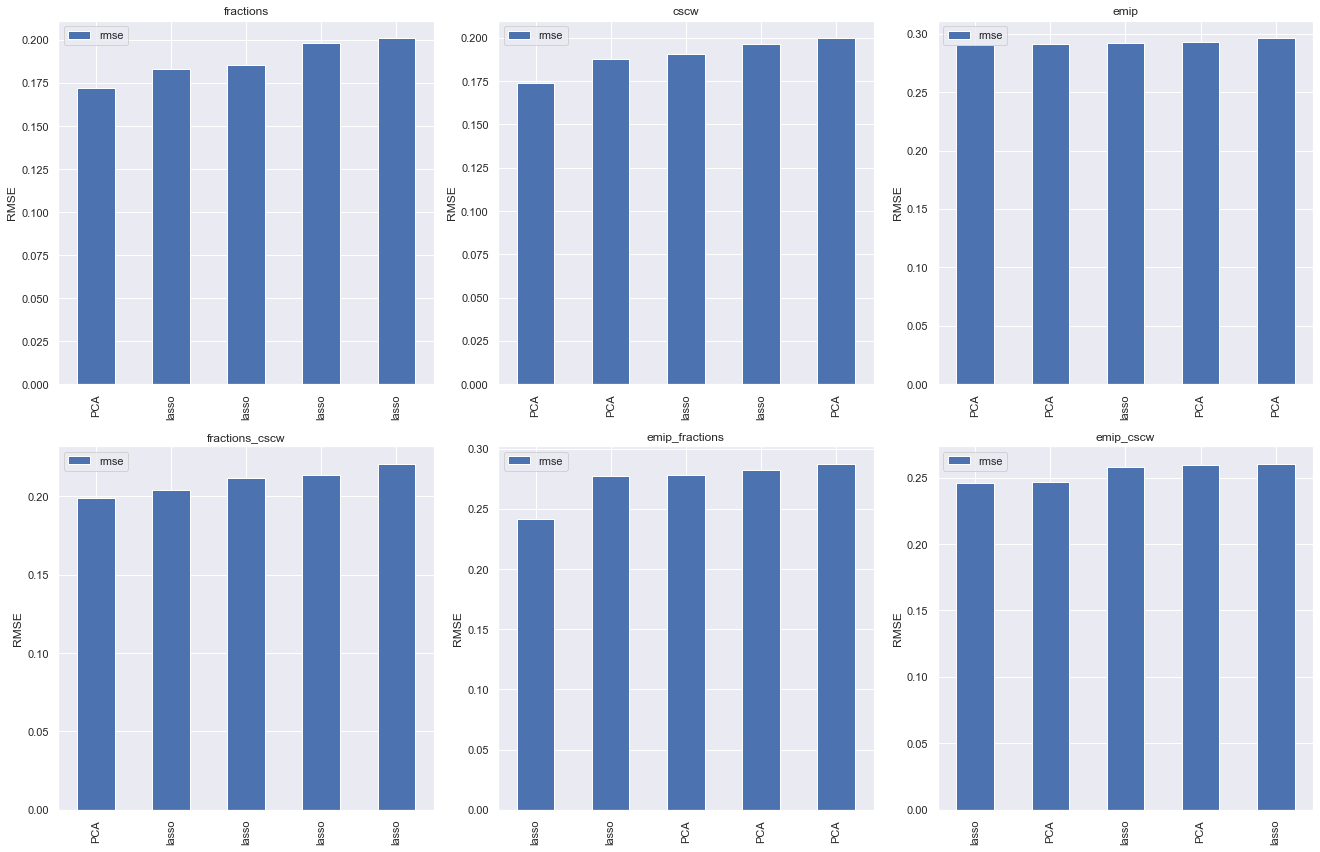

In [135]:
combined_df = pd.concat((one_to_one_df, two_to_one_df))

dfs_grouped_on_in_study = [combined_df[combined_df["in_study"] == dataset] for dataset in combined_df["in_study"].unique()]
dfs = [df.nsmallest(5, "rmse") for df in dfs_grouped_on_in_study] 
titles = [df.loc[:, "in_study"].iloc[0] for df in dfs_grouped_on_in_study]
fig = side_by_side_bar_plot(dfs, titles, y="rmse", y_label="RMSE", x_label="", ticks="dimensionality_reduction")

fig.set_size_inches(18.5, 12, forward=True)
fig.tight_layout()
fig.savefig("plots/dimensionality_reduction_context_sensitivity.jpg")


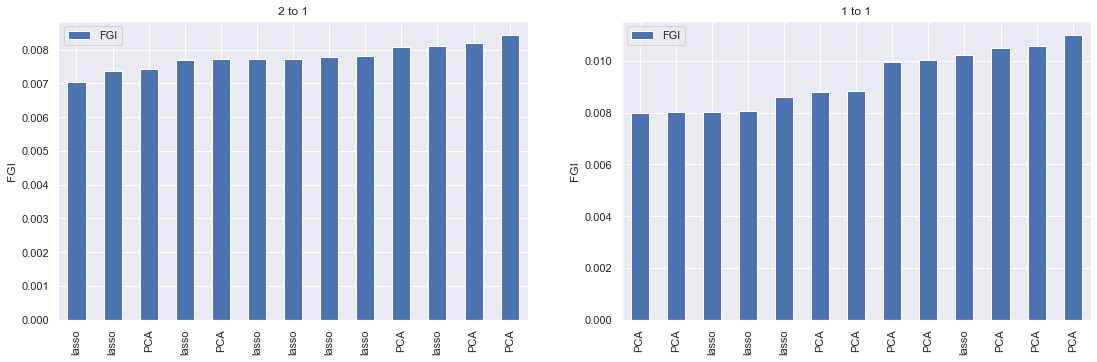

In [136]:
two_to_one_filtered = filter_on_baselines(two_to_one_df)
one_to_one_filtered = filter_on_baselines(one_to_one_df)

smallest_FGI_two_to_one = two_to_one_filtered.nsmallest(13, "FGI")
smallest_FGI_one_to_one = one_to_one_filtered.nsmallest(13, "FGI")
dfs = [smallest_FGI_two_to_one, smallest_FGI_one_to_one]
titles = ["2 to 1", "1 to 1"]

fig = side_by_side_bar_plot(dfs, titles, y="FGI", y_label="FGI", x_label="", ticks="dimensionality_reduction")
fig.set_size_inches(18.5, 5.5, forward=True)
fig.savefig("plots/dimensionality_reduction_generalizability.jpg")


## FEATURES

###  Same training and testing context

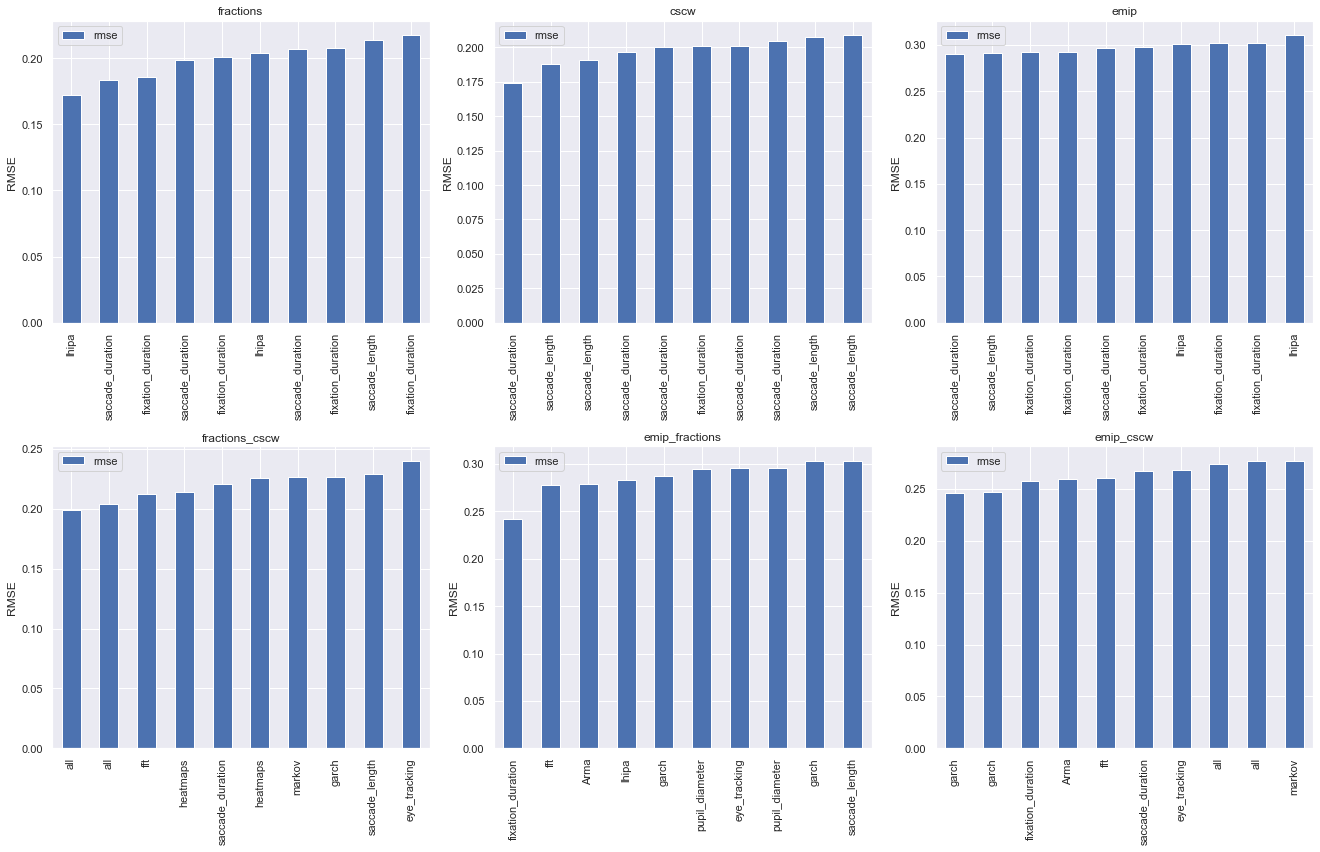

In [137]:
combined_df = pd.concat((one_to_one_df, two_to_one_df))

dfs_grouped_on_in_study = [combined_df[combined_df["in_study"] == dataset] for dataset in combined_df["in_study"].unique()]
dfs = [df.nsmallest(10, "rmse") for df in dfs_grouped_on_in_study] 
titles = [df.loc[:, "in_study"].iloc[0] for df in dfs_grouped_on_in_study]
fig = side_by_side_bar_plot(dfs, titles, y="rmse", y_label="RMSE", x_label="", ticks="feature_combinations")

fig.set_size_inches(18.5, 12, forward=True)
fig.tight_layout()
fig.savefig("plots/feature_groups_context_sensitivity.jpg")


###  Generalizability

,feature_combinations,in_study,FGI
12,garch,fractions_cscw,0.007031
4,fft,fractions_cscw,0.007362
23,all,fractions_cscw,0.007439
76,saccade_duration,fractions_cscw,0.007690
3,heatmaps,fractions_cscw,0.007709
74,saccade_length,fractions_cscw,0.007723
2,heatmaps,fractions_cscw,0.007735
22,all,fractions_cscw,0.007786
8,markov,fractions_cscw,0.007799
61,garch,emip_cscw,0.008065


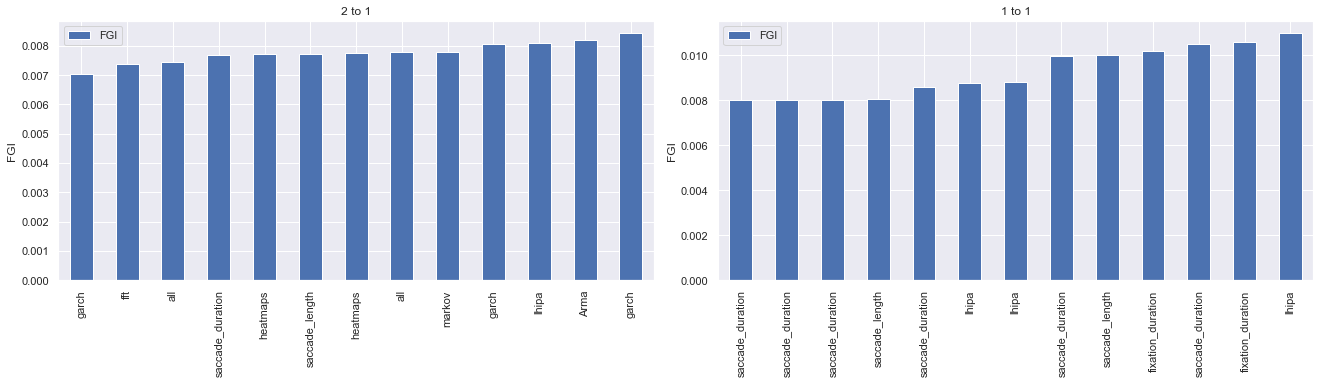

In [138]:
two_to_one_filtered = filter_on_baselines(two_to_one_df)
one_to_one_filtered = filter_on_baselines(one_to_one_df)

smallest_FGI_two_to_one = two_to_one_filtered.nsmallest(13, "FGI")
smallest_FGI_one_to_one = one_to_one_filtered.nsmallest(13, "FGI")
dfs = [smallest_FGI_two_to_one, smallest_FGI_one_to_one]
titles = ["2 to 1", "1 to 1"]



fig = side_by_side_bar_plot(dfs, titles, y="FGI", y_label="FGI", x_label="", ticks="feature_combinations")
fig.set_size_inches(18.5, 5.5, forward=True)
fig.tight_layout()
fig.savefig("plots/feature_groups_generalizability.jpg")
two_to_one_filtered.loc[:, ["feature_combinations", "in_study", "FGI"]].sort_values(by="FGI").nsmallest(13, "FGI")

## Results to CSV

### Pipelines tables FGI

In [139]:
index_name = "Pipeline ID"
mapper = {"dimensionality_reduction": "PCA or Lasso", "feature_combinations": "Feature Group", "in_study": "In Study" }
decimals = {"FGI_RANK": 1, "FGI": 4, "rmse": 3, "RMSE_RANK": 1}

sorted_pipelines_fgi = (
    filter_on_baselines(two_to_one_df)
    .loc[:, ["FGI", "in_study", "feature_combinations", "dimensionality_reduction"]]
    .sort_values(by="FGI")
    .round(decimals)
    .rename(mapper, axis=1)
    .rename_axis(index_name)
)


parts = np.array_split(sorted_pipelines_fgi, 3) 
parts[0].to_csv("plots/two_to_one_generalizable.csv")
parts[2].to_csv("plots/two_to_one_context_sensitivity.csv")

In [140]:
index_name = "Pipeline ID"
mapper = {"dimensionality_reduction": "PCA or Lasso", "feature_combinations": "Feature Group", "in_study": "In Study" }
decimals = {"FGI_RANK": 1, "FGI": 4, "rmse": 3, "RMSE_RANK": 1}

sorted_pipelines_fgi = (
    filter_on_baselines(pd.concat((one_to_one_df, two_to_one_df)))
    .loc[:, ["FGI", "in_study","out_of_study", "feature_combinations", "dimensionality_reduction"]]
    .sort_values(by="FGI")
    .round(decimals)
    .rename(mapper, axis=1)
    .rename_axis(index_name)
)

print(len(sorted_pipelines_fgi))
parts = np.array_split(sorted_pipelines_fgi, 3) 
display(parts[0])
display(parts[2])

57


,FGI,In Study,out_of_study,Feature Group,PCA or Lasso
Pipeline ID,,,,,
12,0.0070,fractions_cscw,emip,garch,lasso
4,0.0074,fractions_cscw,emip,fft,lasso
23,0.0074,fractions_cscw,emip,all,PCA
76,0.0077,fractions_cscw,emip,saccade_duration,lasso
3,0.0077,fractions_cscw,emip,heatmaps,PCA
74,0.0077,fractions_cscw,emip,saccade_length,lasso
2,0.0077,fractions_cscw,emip,heatmaps,lasso
22,0.0078,fractions_cscw,emip,all,lasso
8,0.0078,fractions_cscw,emip,markov,lasso


,FGI,In Study,out_of_study,Feature Group,PCA or Lasso
Pipeline ID,,,,,
89,0.0106,emip,cscw,fixation_duration,PCA
47,0.0110,emip,cscw,lhipa,PCA
70,0.0117,emip_cscw,fractions,all,lasso
6,0.0125,fractions,cscw,lhipa,lasso
2,0.0125,fractions,cscw,saccade_length,lasso
1,0.0126,fractions,cscw,fixation_duration,PCA
49,0.0126,fractions,cscw,fixation_duration,PCA
51,0.0127,fractions,cscw,saccade_length,PCA
48,0.0128,fractions,cscw,fixation_duration,lasso


In [93]:
sorted_pipelines_fgi = (
    filter_on_baselines(two_to_one_df)
    .loc[:, ["FGI", "in_study", "feature_combinations", "dimensionality_reduction"]]
    .sort_values(by="FGI")
)
parts = np.array_split(sorted_pipelines_fgi, 3) 
context_specific = parts[2].groupby(by="feature_combinations").agg(specific_count=("FGI", len))
idk = parts[1].groupby(by="feature_combinations").agg(idk_count=("FGI", len))
generalizable = parts[0].groupby(by="feature_combinations").agg(generalizability_count=("FGI", len))


display(context_specific, idk, generalizable)
count_table = generalizable.join(context_specific).join(idk).fillna(0)
count_table["difference"] = count_table["generalizability_count"] - count_table["specific_count"] 
count_table.sort_values(by="difference", ascending=False)

,specific_count
feature_combinations,
Arma,1.0
all,1.0
eye_tracking,1.0
fft,1.0
heatmaps,1.0
lhipa,1.0
markov,1.0
pupil_diameter,1.0
saccade_length,1.0


,idk_count
feature_combinations,
Arma,1.0
all,1.0
fft,1.0
fixation_duration,2.0
garch,2.0
lhipa,1.0
saccade_duration,1.0


,generalizability_count
feature_combinations,
all,2.0
fft,1.0
garch,2.0
heatmaps,2.0
markov,1.0
saccade_duration,1.0
saccade_length,1.0


,generalizability_count,specific_count,idk_count,difference
feature_combinations,,,,
garch,2.0,0.0,2.0,2.0
all,2.0,1.0,1.0,1.0
heatmaps,2.0,1.0,0.0,1.0
saccade_duration,1.0,0.0,1.0,1.0
fft,1.0,1.0,1.0,0.0
markov,1.0,1.0,0.0,0.0
saccade_length,1.0,1.0,0.0,0.0


### NRMSE AGGERGATED DIM REDUCTION

In [42]:
index_name = "Method"
mapper = {"dimensionality_reduction": index_name, "RMSE_RANK": "NRMSE_RANK", "rmse":"NRMSE"}
decimals = {"FGI_RANK": 1, "FGI": 4, "rmse": 3, "RMSE_RANK": 1}

two_to_one_df.groupby(by=["dimensionality_reduction"]).mean().nsmallest(
    10, ["RMSE_RANK", "rmse"]
).round(decimals).rename(mapper, axis=1).rename_axis(index_name).loc[
    :, ["NRMSE", "NRMSE_RANK"]
].to_csv(
    "plots/2_to_1_dimensionality_reduction_samecontext_aggregated.csv"
)
one_to_one_df.groupby(by=["dimensionality_reduction"]).mean().nsmallest(
    10, ["RMSE_RANK", "rmse"]
).round(decimals).rename(mapper, axis=1).rename_axis(index_name).loc[
    :, ["NRMSE", "NRMSE_RANK"]
].to_csv(
    "plots/1_to_1_dimensionality_reduction_samecontext_aggregated.csv"
)

### NRMSE AGGERGATED  FEATURES

In [39]:
index_name = "Feature Group"
mapper = {"feature_combinations": index_name}
decimals = {"FGI_RANK": 1, "FGI": 4, "rmse": 3, "RMSE_RANK": 1}

one_to_one_df.groupby(by="feature_combinations").mean().nsmallest(
    5, ["RMSE_RANK", "rmse"]
).round(decimals).rename(mapper, axis=1).rename_axis(index_name).loc[
    :, ["rmse", "RMSE_RANK"]
].to_csv(
    "plots/1_to_1_features_samecontext_aggregated.csv"
)
two_to_one_df.groupby(by="feature_combinations").mean().nsmallest(
    5, ["RMSE_RANK", "rmse"]
).round(decimals).rename(mapper, axis=1).rename_axis(index_name).loc[
    :, ["rmse", "RMSE_RANK"]
].to_csv(
    "plots/2_to_1_features_samecontext_aggregated.csv"
)


## FGI PLOTS

In [540]:
in_study_12, oos_12, lol, lol2 = get_rmses(two_to_one_df.iloc[12])
in_study_53, oos_53, lol, lol2 = get_rmses(two_to_one_df.iloc[53])
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 5)

sns.kdeplot(data={"in_study": in_study_12, "oos":oos_12 }, ax=axes[0], common_norm=False).set_title("ID 12")
sns.kdeplot(data={"in_study":in_study_53, "oos": oos_53}, ax=axes[1], common_norm=False).set_title("ID 53")

#fig.savefig("plots/anosim_plot.jpg")

ValueError: too many values to unpack (expected 4)

Text(0.5, 1.0, 'labels')

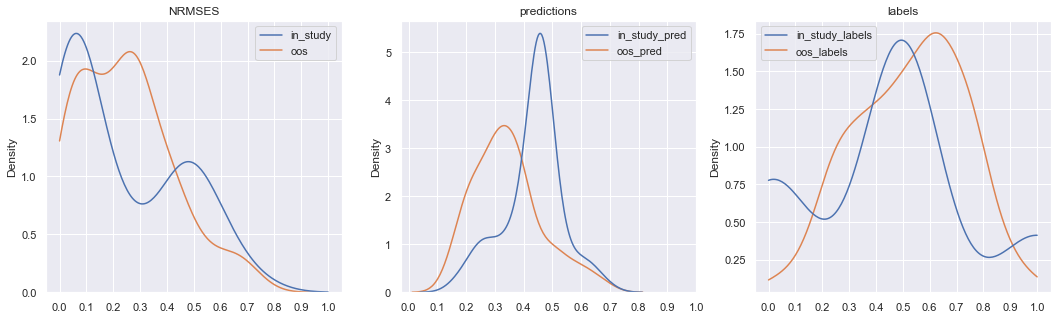

In [389]:
in_study_12, oos_12, labels, oos_labels, in_study_pred, oos_pred = get_rmses(
    two_to_one_df.iloc[31]
)
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(18, 5)

sns.kdeplot(
    data={
        "in_study": in_study_12,
        "oos": oos_12,
    },
    ax=axes[0],
    common_norm=False,
    clip=(0,1)
).set_title("NRMSES")

sns.kdeplot(
    data={
        "in_study_pred": in_study_pred,
        "oos_pred": oos_pred,
    },
    ax=axes[1],
    common_norm=False,
    clip=(0,1)
).set_title("predictions")
axes[0].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
axes[1].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
axes[2].set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

sns.kdeplot(
    data={
        "in_study_labels": labels,
        "oos_labels": oos_labels,
    },
    ax=axes[2],
    common_norm=False,
    clip=(0,1)
).set_title("labels")

# fig.savefig("plots/anosim_plot.jpg")

## Results to CSV GRAVEYARD

In [38]:
index_name = "Method"
mapper = {"dimensionality_reduction": index_name}
decimals = {"FGI_RANK": 1, "FGI": 4, "rmse": 3, "RMSE_RANK": 1}

filter_on_baselines(two_to_one_df).groupby(
    by=["dimensionality_reduction"]
).mean().nsmallest(5, ["FGI_RANK", "FGI"]).round(decimals).rename(
    mapper, axis=1
).rename_axis(
    index_name
).loc[
    :, ["FGI_RANK", "FGI"]
].to_csv(
    "plots/2_to_1_dimensionality_reduction_generalizability_aggregated.csv"
)
filter_on_baselines(one_to_one_df).groupby(
    by=["dimensionality_reduction"]
).mean().nsmallest(5, ["FGI_RANK", "FGI"]).round(decimals).rename(
    mapper, axis=1
).rename_axis(
    index_name
).loc[
    :, ["FGI_RANK", "FGI"]
].to_csv(
    "plots/1_to_1_dimensionality_reduction_generalizability_aggregated.csv"
)
two_to_one_df.groupby(by=["dimensionality_reduction"]).mean().nsmallest(
    10, ["RMSE_RANK", "rmse"]
).round(decimals).rename(mapper, axis=1).rename_axis(index_name).loc[
    :, ["rmse", "RMSE_RANK"]
].to_csv(
    "plots/2_to_1_dimensionality_reduction_samecontext_aggregated.csv"
)
one_to_one_df.groupby(by=["dimensionality_reduction"]).mean().nsmallest(
    10, ["RMSE_RANK", "rmse"]
).round(decimals).rename(mapper, axis=1).rename_axis(index_name).loc[
    :, ["rmse", "RMSE_RANK"]
].to_csv(
    "plots/1_to_1_dimensionality_reduction_samecontext_aggregated.csv"
)

In [39]:
index_name = "Feature Group"
mapper = {"feature_combinations": index_name}
decimals = {"FGI_RANK": 1, "FGI": 4, "rmse": 3, "RMSE_RANK": 1}

filter_on_baselines(one_to_one_df).groupby(by="feature_combinations").mean().nsmallest(
    5, ["FGI_RANK", "FGI"]
).round(decimals).rename(mapper, axis=1).rename_axis(index_name).loc[
    :, ["FGI", "FGI_RANK"]
].to_csv(
    "plots/1_to_1_features_generalizability_aggregated.csv"
)
filter_on_baselines(two_to_one_df).groupby(by="feature_combinations").mean().nsmallest(
    5, ["FGI_RANK", "FGI"]
).round(decimals).rename(mapper, axis=1).rename_axis(index_name).loc[
    :, ["FGI", "FGI_RANK"]
].to_csv(
    "plots/2_to_1_features_generalizability_aggregated.csv"
)
one_to_one_df.groupby(by="feature_combinations").mean().nsmallest(
    5, ["RMSE_RANK", "rmse"]
).round(decimals).rename(mapper, axis=1).rename_axis(index_name).loc[
    :, ["rmse", "RMSE_RANK"]
].to_csv(
    "plots/1_to_1_features_samecontext_aggregated.csv"
)
two_to_one_df.groupby(by="feature_combinations").mean().nsmallest(
    5, ["RMSE_RANK", "rmse"]
).round(decimals).rename(mapper, axis=1).rename_axis(index_name).loc[
    :, ["rmse", "RMSE_RANK"]
].to_csv(
    "plots/2_to_1_features_samecontext_aggregated.csv"
)
